## 6.5 Unsupervised Machine Learning - Clustering



### Content:

### 1. Import Libraries and Data

### 2. Data cleaning

### 3. The elbow technique¶

### 4. k-means clustering¶

### 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [2]:
# Ensure the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create path

path = r'C:\Users\Frederick\Documents\17-12-2023 World University Rankings'

In [4]:
# Import data for time ranking

the = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'times.csv'), index_col = False)

In [5]:
# Import data for shanghai ranking

shanghai = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'shanghai.csv'), index_col = False)

In [6]:
# Import data for cwur ranking

cwur = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'cwur.csv'), index_col = False)

### 2. Data cleaning

#### For this exercise, I will look at clustering on the three ranking bodies. That is their total ranking scores with the various indicators/variables. From previous exercise, I know that:

#### Times ranking - the total scores are blank for universities ranking above 200, therefore these will be removed.

#### Shanghai ranking - the total scores are blank for universities ranking above 100, therefore these will be removed.¶

#### CWUR ranking - the total scores are complete but some of the variables have missing values, and the universities ranking is up to 1000 for later years. I will include all of them first for the regression analysis and see the result.

In [7]:
the.shape

(2603, 14)

In [8]:
# Checking for missing values in times ranking dataframe

the.isnull().sum() # All missing values in total score will be removed. 

Unnamed: 0                   0
world_rank                   0
university_name              0
country                      0
teaching                     0
international                9
research                     0
citations                    0
income                     218
total_score               1402
num_students                59
student_staff_ratio         59
international_students      67
year                         0
dtype: int64

In [9]:
# Rename column total_score with shorter name

the.rename(columns = {'total_score': 'scores'}, inplace = True)

In [10]:
# Creating a subset in without missing total scores in times dataframe 

the_sub = the[the['scores'].isnull() == False]

In [11]:
# Checking output of the times subset

the_sub.shape # Count is correct after removing missing total scores

(1201, 14)

In [12]:
# Create a subset for Times ranking with only total score and the five categories 

the_sub2 = the_sub[['teaching', 'international', 'research','citations', 'income', 'scores']]

In [13]:
# Checking datatype of subset

the_sub2.dtypes

teaching         float64
international    float64
research         float64
citations        float64
income           float64
scores           float64
dtype: object

In [14]:
# Checking for missing values in times ranking subset

the_sub2.isnull().sum() # Some missing values in income and international (11%).

teaching           0
international      9
research           0
citations          0
income           140
scores             0
dtype: int64

In [15]:
# Creating a subset in without missing income scores in times dataframe 

the_sub3 = the_sub2[the_sub2['income'].isnull() == False]

In [16]:
# Creating a subset in without missing international scores in times dataframe 

the_sub4 = the_sub3[the_sub3['international'].isnull() == False]

In [17]:
the_sub4.shape

(1056, 6)

In [18]:
shanghai.shape

(4896, 13)

In [19]:
# Checking for missing values in shanghai ranking dataframe

shanghai.isnull().sum() # All missing values in total score will be removed. 

Unnamed: 0             0
world_rank             0
university_name        0
country             1490
national_rank          0
total_score         3795
alumni                 0
award                  1
cited_research         1
articles              21
science_citation       1
capita                 1
year                   0
dtype: int64

In [20]:
# Renaming column names

shanghai.rename(columns = {'total_score' : 'scores', 'alumni' : 'alumni award', 'award' : 'staff award', 'cited_research' : 'citations', 'articles' : 'papers published', 'science_citation' : 'papers indexed'}, inplace = True)

In [21]:
# Creating a subset in without missing total scores in shanghai dataframe 

shanghai_sub = shanghai[shanghai['scores'].isnull() == False]

In [22]:
# Checking output of the times subset

shanghai_sub.shape # Count is correct after removing missing total scores

(1101, 13)

In [23]:
# Create a subset for Shanghai ranking with only total score and the six categories 

shanghai_sub2 = shanghai_sub[['alumni award', 'staff award', 'citations', 'papers published', 'papers indexed','capita', 'scores']]

In [24]:
# Checking datatype of subset

shanghai_sub2.dtypes

alumni award        float64
staff award         float64
citations           float64
papers published    float64
papers indexed      float64
capita              float64
scores              float64
dtype: object

In [25]:
# Checking for missing values in shanghai ranking subset

shanghai_sub2.isnull().sum() # No more missing values in the subset

alumni award        0
staff award         0
citations           0
papers published    0
papers indexed      0
capita              0
scores              0
dtype: int64

In [26]:
cwur.shape

(2200, 15)

In [27]:
# Checking for missing values in cwur ranking dataframe

cwur.isnull().sum() # Missing value in broad_impact (9%).

Unnamed: 0                0
world_rank                0
university_name           0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [28]:
# Renaming column names

cwur.rename(columns = {'quality_of_education' : 'alumni award', 'alumni_employment' : 'alumni employment', 'quality_of_faculty' : 'staff award', 'broad_impact' : 'broad impact', 'score' : 'scores'}, inplace = True)

In [29]:
# Create a subset for cwur ranking with only total score and the seven categories 

cwur_sub = cwur[['alumni award', 'alumni employment', 'staff award', 'publications', 'influence', 'citations','broad impact', 'patents', 'scores']]

In [30]:
# Creating a subset in without missing total scores in times dataframe 

cwur_sub2 = cwur_sub[cwur_sub['broad impact'].isnull() == False]

In [31]:
cwur_sub2.shape

(2000, 9)

In [32]:
# Checking datatype of subset

cwur_sub.dtypes

alumni award           int64
alumni employment      int64
staff award            int64
publications           int64
influence              int64
citations              int64
broad impact         float64
patents                int64
scores               float64
dtype: object

In [33]:
# Checking stats on measurements for times subset

the_sub4.describe() # All variables using same scale, 0 - 100.

,teaching,international,research,citations,income,scores
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,50.043750,61.101799,51.969981,76.809659,54.239015,59.631061
std,16.922232,20.898036,19.578680,15.613100,22.687776,12.714610
min,15.900000,14.800000,13.100000,8.600000,24.200000,41.400000
25%,37.700000,45.500000,36.900000,66.500000,36.400000,50.200000
50%,46.450000,61.600000,48.100000,78.600000,45.800000,55.800000
75%,59.550000,79.100000,64.700000,89.100000,68.125000,65.900000
max,99.700000,100.000000,99.400000,100.000000,100.000000,96.100000


In [34]:
# Checking stats on measurements for shanghai subset

shanghai_sub2.describe() # All variables using same scale, 0 - 100.

,alumni award,staff award,citations,papers published,papers indexed,capita,scores
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,25.576658,26.719255,35.376748,32.587103,53.767666,31.522343,36.383470
std,18.650148,22.021721,16.105656,15.019464,12.279979,12.621984,13.557186
min,0.000000,0.000000,0.000000,5.600000,19.000000,14.800000,23.500000
25%,14.400000,14.100000,24.100000,21.900000,45.800000,24.500000,27.400000
50%,21.300000,22.200000,32.300000,28.300000,52.400000,28.400000,31.300000
75%,32.900000,34.000000,43.700000,40.500000,62.000000,34.200000,41.800000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [35]:
# Checking stats on measurements for cwur subset

cwur_sub2.describe() # Variables using different scalings, most are rankings and some scores. Need to normalise.

,alumni award,alumni employment,staff award,publications,influence,citations,broad impact,patents,scores
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,296.001500,385.263500,191.127500,500.415000,500.21900,449.341500,496.699500,470.321000,47.067630
std,106.868798,171.874782,52.402579,288.674823,288.30505,250.141228,286.919755,259.625408,6.590461
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,44.020000
25%,250.750000,250.750000,210.000000,250.750000,250.75000,234.000000,250.500000,242.750000,44.440000
50%,355.000000,478.000000,210.000000,500.500000,500.50000,428.000000,496.000000,481.000000,44.960000
75%,367.000000,500.250000,218.000000,750.000000,750.25000,645.000000,741.000000,737.000000,46.812500
max,367.000000,567.000000,218.000000,1000.000000,991.00000,812.000000,1000.000000,871.000000,100.000000


In [36]:
# Define standard scaler 

scaler = StandardScaler() 

In [37]:
# Normalise data for cwur subset

cwur_sub2 = scaler.fit_transform(cwur_sub2) 

In [38]:
# Checking output after normalising

cwur_sub2

array([[-2.7610985 , -2.23627689, -3.62911624, ..., -1.72809109,
        -1.80428459,  8.03367327],
       [-2.66750242, -2.23045725, -3.57185283, ..., -1.71763259,
        -1.78887393,  7.89556038],
       [-2.74237929, -2.17808045, -3.61002844, ..., -1.72460492,
        -1.80813726,  7.83485142],
       ...,
       [ 0.66451815,  0.95288819,  0.51293698, ...,  1.66743527,
         1.36260721, -0.46102842],
       [ 0.66451815,  1.05764179,  0.51293698, ...,  1.66743527,
         0.69609592, -0.46254614],
       [ 0.66451815,  1.05764179,  0.51293698, ...,  1.68835227,
         0.29541861, -0.46254614]])

### 3. The elbow technique

In [39]:
# Define clusters range and kmeans within the defined range for times subset

num_the = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_the] 

In [40]:
# Create a score for the clusters for times subset

score_the = [kmeans[i].fit(the_sub4).score(the_sub4) for i in range(len(kmeans))]

score_the

C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

[-2138041.818996212,
 -1478821.6433271295,
 -1135282.7153184842,
 -940036.4544483351,
 -848968.683028392,
 -763894.577288964,
 -703228.0747948238,
 -630972.9446364476,
 -586446.514447127]

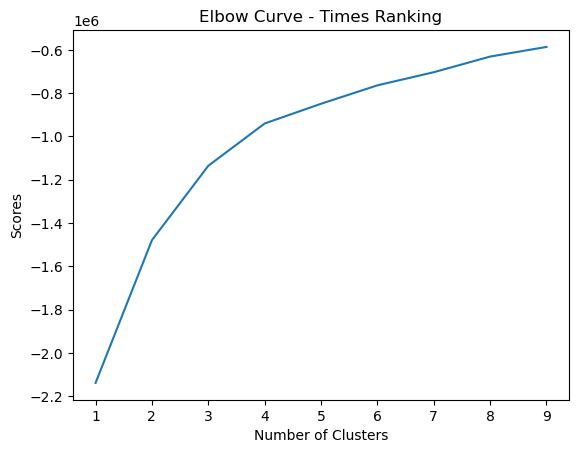

In [41]:
# Plot the elbow curve using PyLab for times subset

pl.plot(num_the,score_the)
pl.xlabel('Number of Clusters')
pl.ylabel('Scores')
pl.title('Elbow Curve - Times Ranking')
pl.show()

### For the Times ranking, I decided to use 4 clusters in the algorithm. It's clear that there's a steeper increase from cluster 1 to 2, and cluster 2 to 3. The increase from cluster 3 to 4 is relatively smaller but in my opinion might still help to explain the variances in the data. From culster 4 onwards, the increase is minimal. 

In [42]:
# Define clusters range and kmeans within the defined range for shanghai subset

num_shanghai = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_shanghai] 

In [43]:
# Create a score for the clusters for shanghai subset

score_shanghai = [kmeans[i].fit(shanghai_sub2).score(shanghai_sub2) for i in range(len(kmeans))]

score_shanghai

C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

[-1992837.3419073569,
 -973263.6251705129,
 -714390.4637047957,
 -595791.3270916686,
 -515145.4143987522,
 -466725.6492095087,
 -430086.9168359871,
 -404579.9457278099,
 -371923.63873953954]

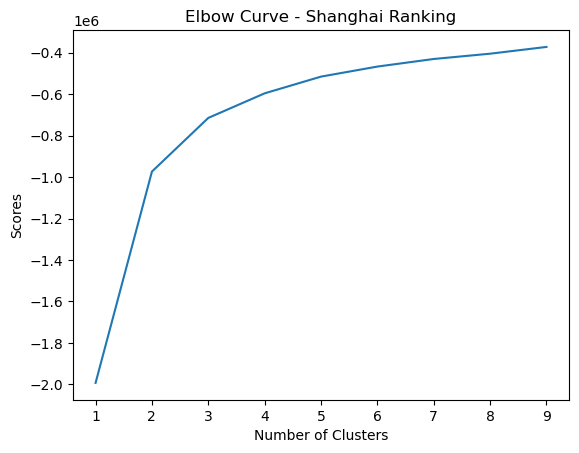

In [44]:
# Plot the elbow curve using PyLab for shanghai subset

pl.plot(num_shanghai,score_shanghai)
pl.xlabel('Number of Clusters')
pl.ylabel('Scores')
pl.title('Elbow Curve - Shanghai Ranking')
pl.show()

### For Shanghai ranking, I decided to use 3 clusters in the algorithm. There's a steep increase from cluster 1 to 2, and reasonable increase from cluster 2 to 3. From cluster 3 onwards, the increase/slope is mucht smaller and indicates that there's probably not much value of adding the clusters as they doesn't help to explain the variables to much extent. 

In [45]:
# Define clusters range and kmeans within the defined range for cwur subset

num_cwur = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cwur] 

In [46]:
# Create a score for the clusters for cwur subset

score_cwur = [kmeans[i].fit(cwur_sub2).score(cwur_sub2) for i in range(len(kmeans))]

score_cwur

C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

[-18000.0,
 -10058.477217568927,
 -7551.946036574448,
 -6528.552280339026,
 -5716.628442486319,
 -5261.688067389926,
 -4892.147951804263,
 -4549.183499900265,
 -4306.850966211577]

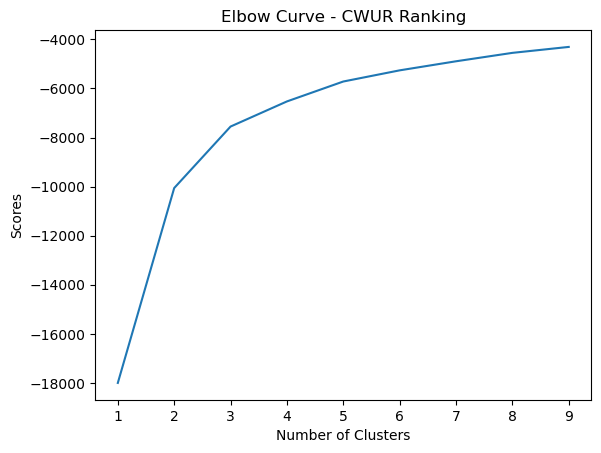

In [47]:
# Plot the elbow curve using PyLab for cwur subset

pl.plot(num_cwur,score_cwur)
pl.xlabel('Number of Clusters')
pl.ylabel('Scores')
pl.title('Elbow Curve - CWUR Ranking')
pl.show()

### Similar to Shanghai ranking, I decided to use 3 clusters in the algorithm for CWUR ranking. There's a steep increase from cluster 1 to 2, and reasonable increase from cluster 2 to 3. From cluster 3 onwards, the increase/slope is mucht smaller and indicates that there's probably not much value of adding the clusters as they doesn't help to explain the variables to much extent.

### 4. k-means clustering

In [48]:
# Create the k-means object for times ranking

kmeans_the = KMeans(n_clusters = 4) 

In [49]:
# Fit the k-means object to the times ranking data.

kmeans_the.fit(the_sub4)

C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [50]:
# Creating new cluster column to the times ranking subset

the_sub4['clusters'] = kmeans_the.fit_predict(the_sub4)

C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Frederick\AppData\Local\Temp\ipykernel_964\1448399176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_sub4['clusters'] = kmeans_the.fit_predict(the_sub4)


In [51]:
# Checking output for times ranking with clusters

the_sub4.head()

,teaching,international,research,citations,income,scores,clusters
0,99.7,72.4,98.7,98.8,34.5,96.1,1
1,97.7,54.6,98.0,99.9,83.7,96.0,1
2,97.8,82.3,91.4,99.9,87.5,95.6,1
3,98.3,29.5,98.1,99.2,64.3,94.3,1
5,90.5,77.7,94.1,94.0,57.0,91.2,1


In [52]:
# Checking counts on each cluster for times ranking

the_sub4['clusters'].value_counts()

clusters
0    358
3    285
1    212
2    201
Name: count, dtype: int64

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


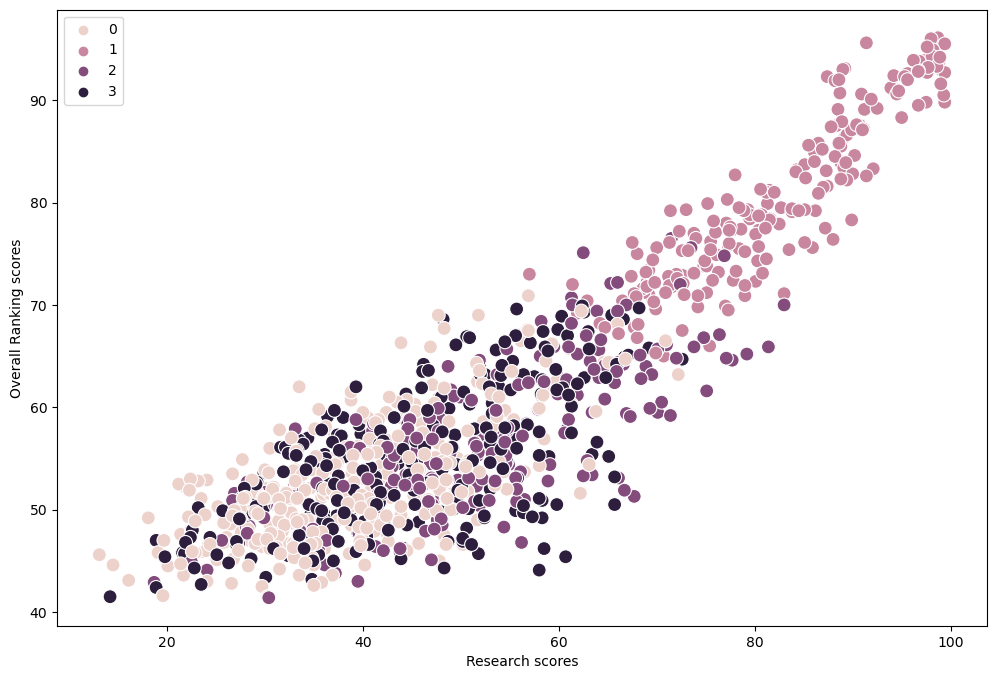

In [53]:
# Plot the clusters for the ranking scores and research variables for Times ranking

plt.figure(figsize=(12,8))
ax_the = sns.scatterplot(x=the_sub4['research'], y=the_sub4['scores'], hue=kmeans_the.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax_the.grid(False) # This removes the grid from the background.
plt.xlabel('Research scores') # Label x-axis.
plt.ylabel('Overall Ranking scores') # Label y-axis.
plt.show()

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


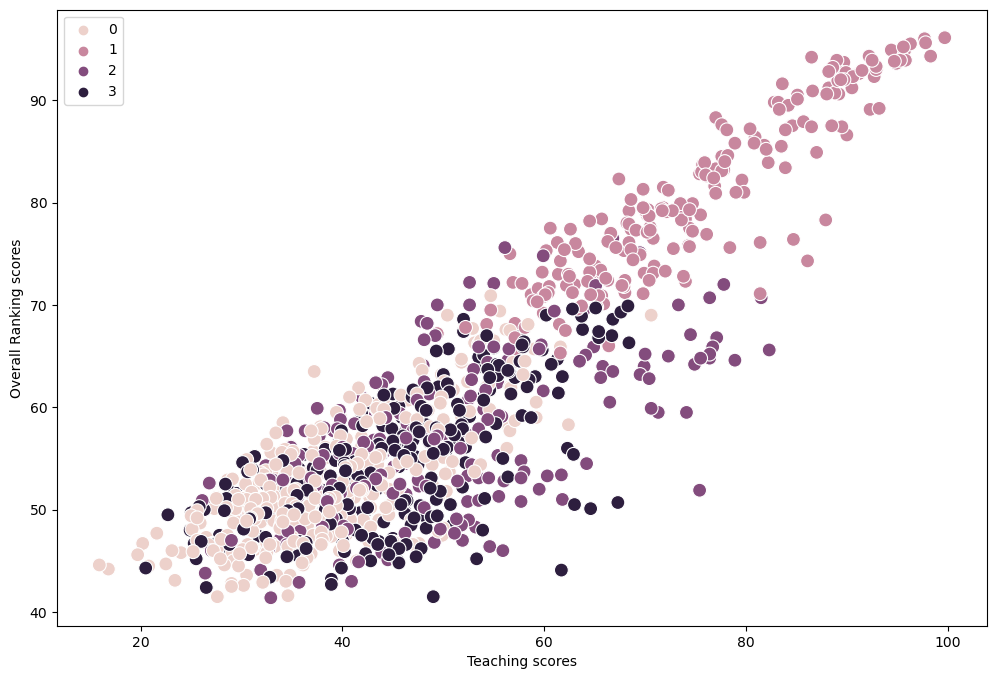

In [54]:
# Plot the clusters for the ranking scores and teaching variables for Times ranking

plt.figure(figsize=(12,8))
ax_the = sns.scatterplot(x=the_sub4['teaching'], y=the_sub4['scores'], hue=kmeans_the.labels_, s=100) 

ax_the.grid(False) 
plt.xlabel('Teaching scores') 
plt.ylabel('Overall Ranking scores') 
plt.show()

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


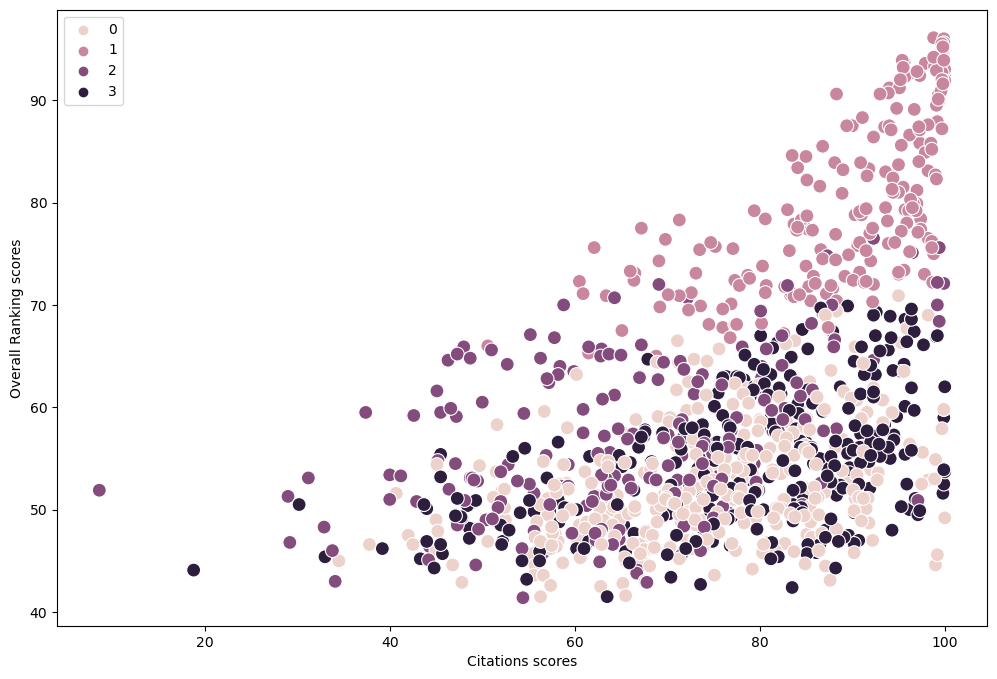

In [55]:
# Plot the clusters for the ranking scores and citations variables for Times ranking

plt.figure(figsize=(12,8))
ax_the = sns.scatterplot(x=the_sub4['citations'], y=the_sub4['scores'], hue=kmeans_the.labels_, s=100) 

ax_the.grid(False) 
plt.xlabel('Citations scores') 
plt.ylabel('Overall Ranking scores') 
plt.show()

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


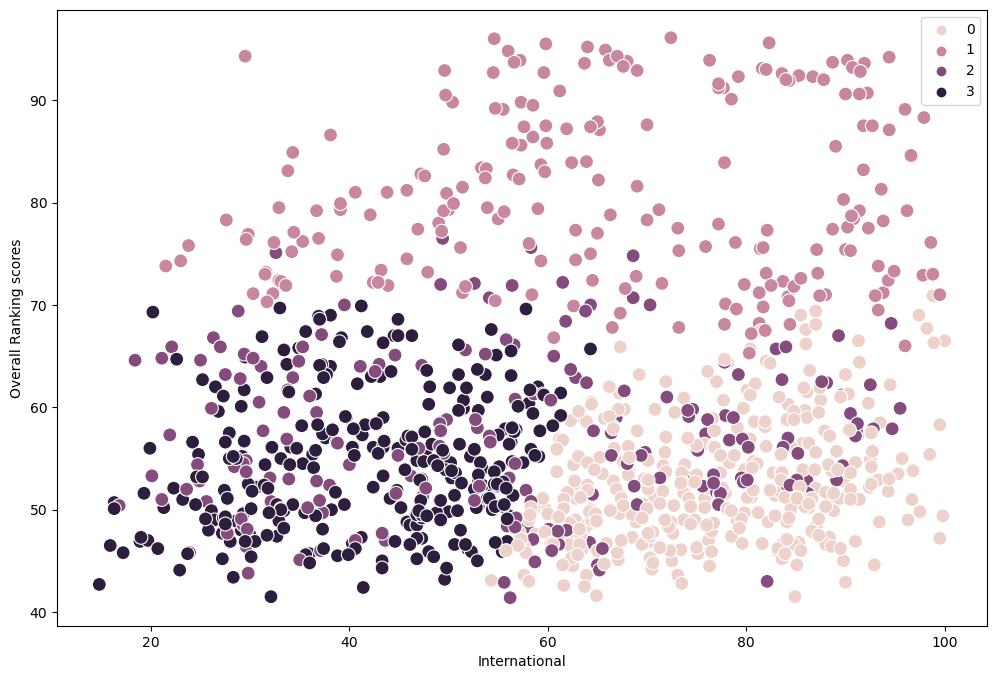

In [56]:
# Plot the clusters for the ranking scores and international variables for Times ranking

plt.figure(figsize=(12,8))
ax_the = sns.scatterplot(x=the_sub4['international'], y=the_sub4['scores'], hue=kmeans_the.labels_, s=100) 

ax_the.grid(False) 
plt.xlabel('International') 
plt.ylabel('Overall Ranking scores') 
plt.show()

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


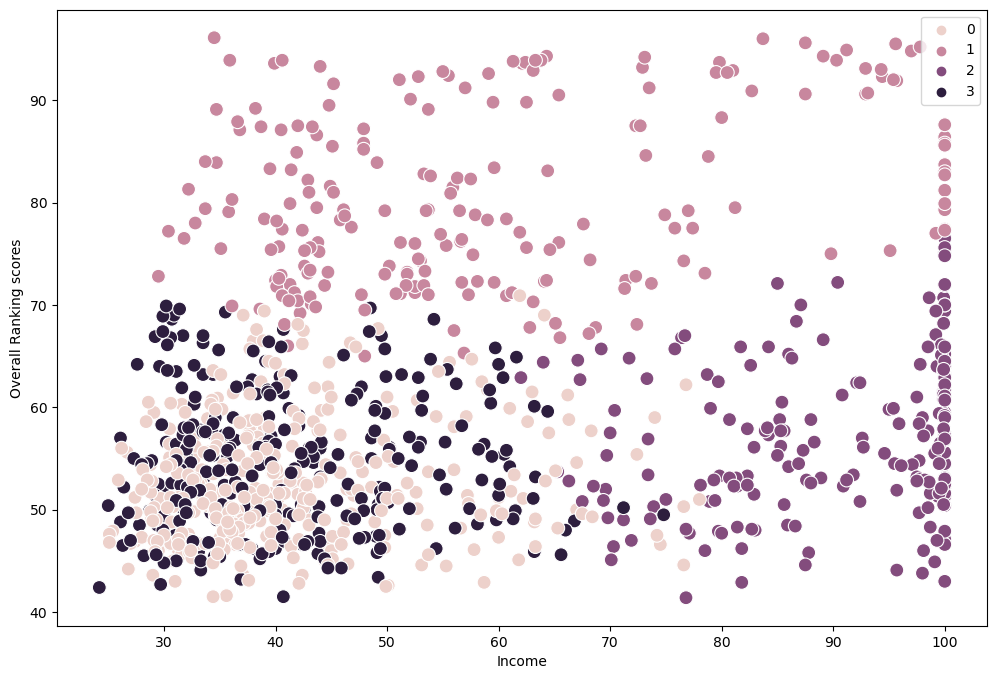

In [57]:
# Plot the clusters for the ranking scores and income variables for Times ranking

plt.figure(figsize=(12,8))
ax_the = sns.scatterplot(x=the_sub4['income'], y=the_sub4['scores'], hue=kmeans_the.labels_, s=100) 

ax_the.grid(False) 
plt.xlabel('Income') 
plt.ylabel('Overall Ranking scores') 
plt.show()

### From the above visualizations, it seems there's a cluster that's getting the higer ranking scores (represented by pink colour). This cluster has high academic scores (research, teaching and citations). In terms of international mix and income indicator, they range from low to high scores. 

### For the other three clusters, they are at the lower range of overall ranking scores (below 70) and they are all doing similar with the research and teaching scores. For citations, they are also similar with the pink cluster, although there are more variances (i.e. they spread over to the lower citation scores as well). What separates them is at the international indicator. It's clear that there's a cluster that's getting higher internationsl score (black), another cluster getting lower international score (light pink) and yet another cluster (purple) that spread across the international scores (low to high). 

### This kind of makes sense given the weighting. The academic indicators are getting higher weightings in the ranking system, hence those universities that are getting higher academic related scores are doing better overall in the ranking score. Those universities that get lower scores, then most likely other variables such as international and income comes into play and have an impact on their overall ranking scores. 

In [58]:
the_sub4.loc[the_sub4['clusters'] == 3, 'cluster'] = 'black'
the_sub4.loc[the_sub4['clusters'] == 2, 'cluster'] = 'purple'
the_sub4.loc[the_sub4['clusters'] == 1, 'cluster'] = 'pink'
the_sub4.loc[the_sub4['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\Frederick\AppData\Local\Temp\ipykernel_964\610196285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_sub4.loc[the_sub4['clusters'] == 3, 'cluster'] = 'black'
C:\Users\Frederick\AppData\Local\Temp\ipykernel_964\610196285.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'black' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  the_sub4.loc[the_sub4['clusters'] == 3, 'cluster'] = 'black'


In [59]:
# Finding descriptive stats for the clusters

the_sub4.groupby('cluster').agg({'research':['mean', 'median'], 
                         'teaching':['mean', 'median'], 
                         'citations':['mean', 'median'],
                         'international':['mean', 'median'],
                         'income':['mean', 'median'],
                          'scores':['mean', 'median']})

research          teaching         citations         \
                 mean median       mean median       mean median   
cluster                                                            
black       44.690877   44.8  45.097544  45.50  77.860000  80.90   
light pink  39.527374   39.0  39.215642  38.00  74.518156  75.45   
pink        82.416509   81.5  75.228302  73.95  89.340094  92.25   
purple      52.339801   51.9  49.780100  48.10  66.185572  66.30   

           international            income            scores         
                    mean median       mean median       mean median  
cluster                                                              
black          41.693684  43.10  41.588772   40.0  54.585965   54.2  
light pink     76.515363  76.55  41.344972   38.4  52.713966   51.6  
pink           66.332547  65.50  59.214151   54.9  80.625943   79.2  
purple         55.650746  56.40  89.894030   95.0  56.960697   56.1

### The above statistics, along with the cluster analysis, indicates that the data could be split into the following group: universities that produce high quality research and teaching output; universities that have international mix but but lower rank and universities that have high income but lower rank. 

In [60]:
# Create the k-means object for shanghai ranking

kmeans_shanghai = KMeans(n_clusters = 3) 

In [61]:
# Fit the k-means object to the shanghai ranking data.

kmeans_shanghai.fit(shanghai_sub2)

C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [62]:
# Creating new cluster column to the shanghai ranking subset

shanghai_sub2['clusters'] = kmeans_the.fit_predict(shanghai_sub2)

C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Frederick\AppData\Local\Temp\ipykernel_964\217342466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shanghai_sub2['clusters'] = kmeans_the.fit_predict(shanghai_sub2)


In [63]:
# Checking output for shanghai ranking with clusters - times ranking

shanghai_sub2.head()

,alumni award,staff award,citations,papers published,papers indexed,capita,scores,clusters
0,100.0,100.0,100.0,100.0,100.0,72.4,100.0,1
1,99.8,93.4,53.3,56.6,70.9,66.9,73.6,1
2,41.1,72.2,88.5,70.9,72.3,65.0,73.4,1
3,71.8,76.0,69.4,73.9,72.2,52.7,72.8,1
4,74.0,80.6,66.7,65.8,64.3,53.0,70.1,1


In [64]:
# Checking counts on each cluster for shanghai ranking

the_sub4['clusters'].value_counts()

clusters
0    358
3    285
1    212
2    201
Name: count, dtype: int64

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


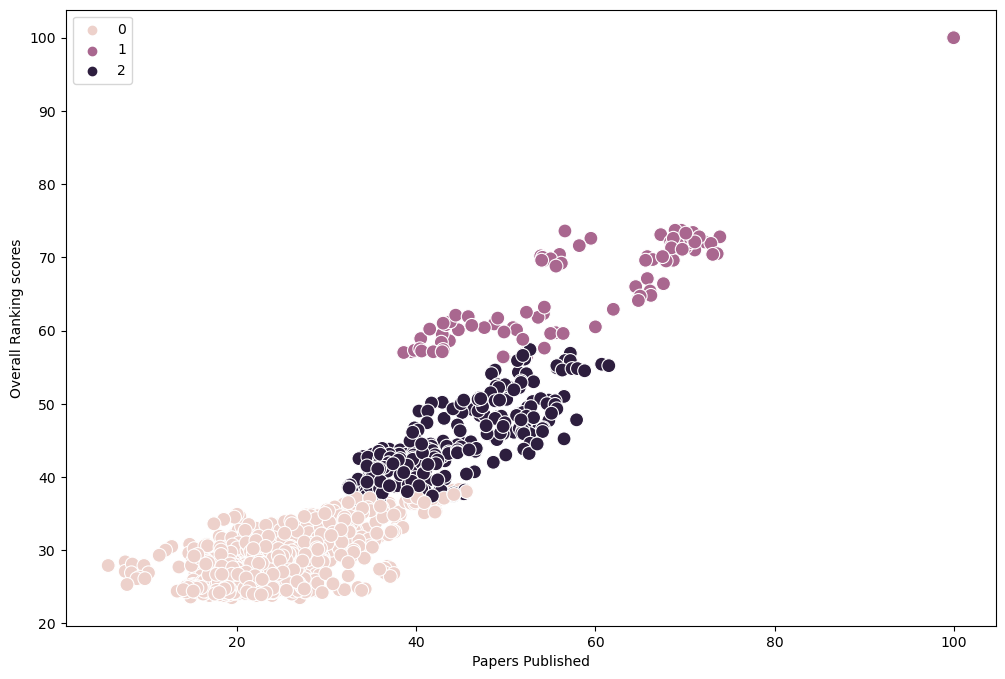

In [65]:
# Plot the clusters for the ranking scores and papers published variables for shanghai ranking

plt.figure(figsize=(12,8))
ax_shanghai = sns.scatterplot(x=shanghai_sub2['papers published'], y=shanghai_sub2['scores'], hue=kmeans_shanghai.labels_, s=100) 

ax_the.grid(False) 
plt.xlabel('Papers Published') 
plt.ylabel('Overall Ranking scores') 
plt.show()

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


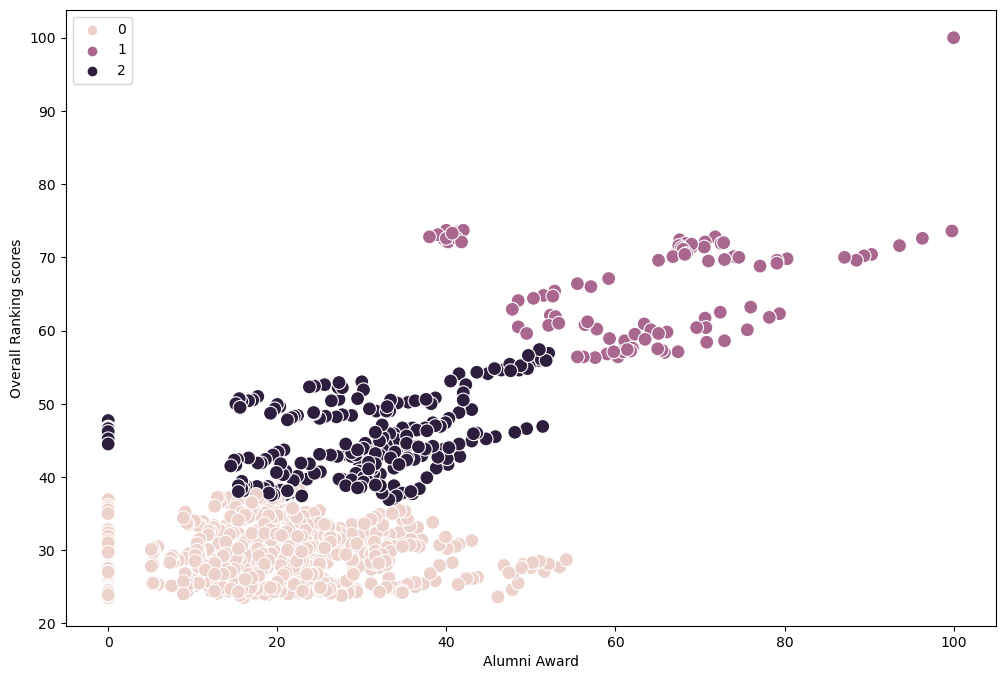

In [66]:
# Plot the clusters for the ranking scores and alumni award variables for shanghai ranking

plt.figure(figsize=(12,8))
ax_shanghai = sns.scatterplot(x=shanghai_sub2['alumni award'], y=shanghai_sub2['scores'], hue=kmeans_shanghai.labels_, s=100) 

ax_the.grid(False) 
plt.xlabel('Alumni Award') 
plt.ylabel('Overall Ranking scores') 
plt.show()

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


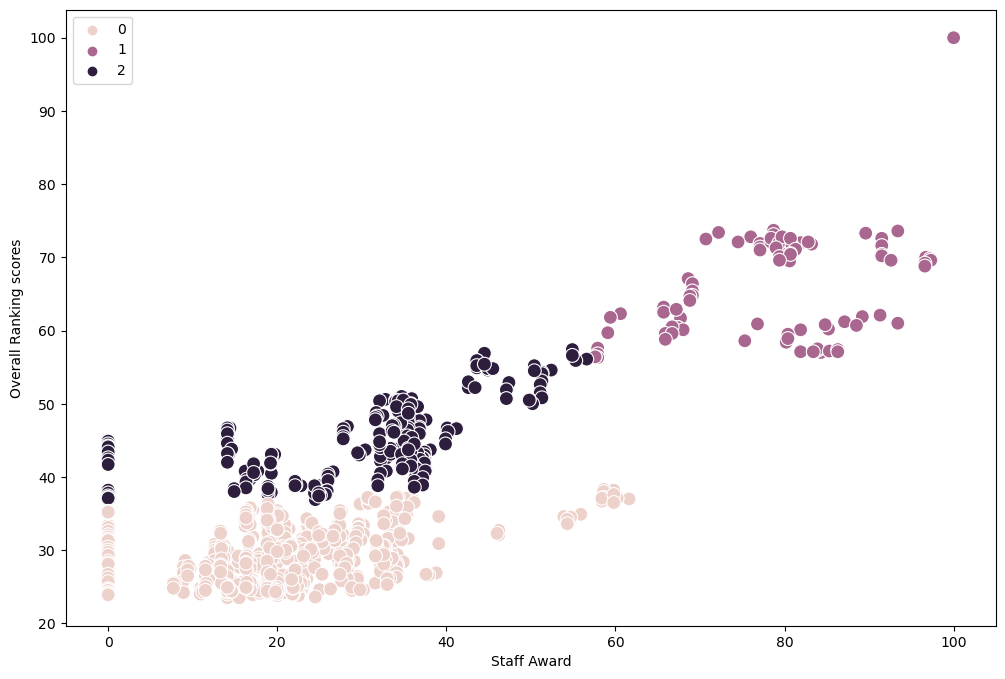

In [67]:
# Plot the clusters for the ranking scores and staff award variables for shanghai ranking

plt.figure(figsize=(12,8))
ax_shanghai = sns.scatterplot(x=shanghai_sub2['staff award'], y=shanghai_sub2['scores'], hue=kmeans_shanghai.labels_, s=100) 

ax_the.grid(False) 
plt.xlabel('Staff Award') 
plt.ylabel('Overall Ranking scores') 
plt.show()

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


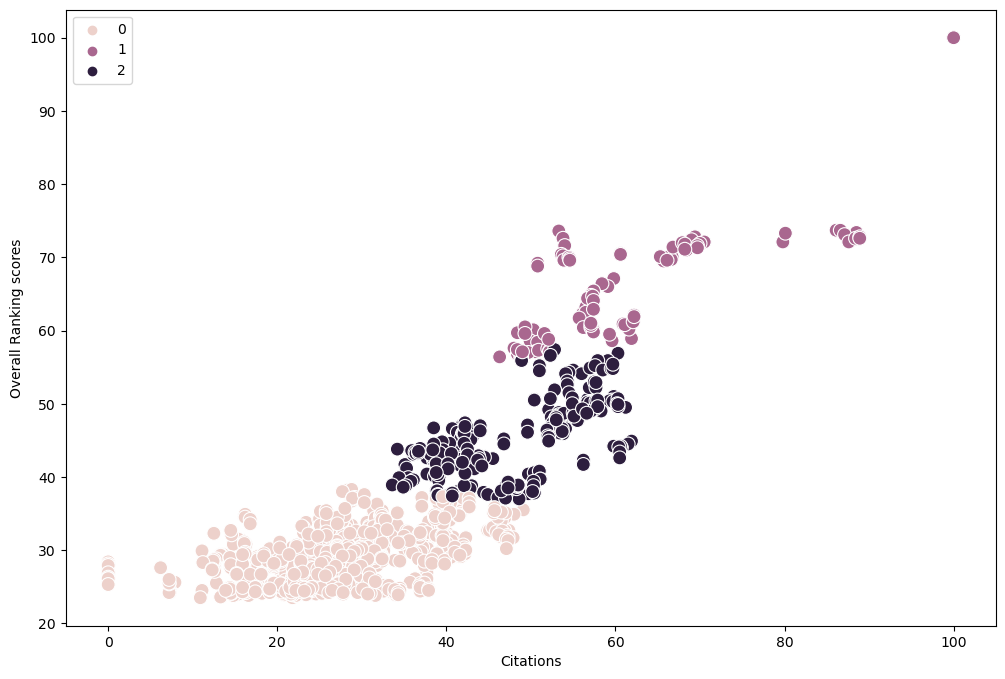

In [68]:
# Plot the clusters for the ranking scores and citations variables for shanghai ranking

plt.figure(figsize=(12,8))
ax_shanghai = sns.scatterplot(x=shanghai_sub2['citations'], y=shanghai_sub2['scores'], hue=kmeans_shanghai.labels_, s=100) 

ax_the.grid(False) 
plt.xlabel('Citations') 
plt.ylabel('Overall Ranking scores') 
plt.show()

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


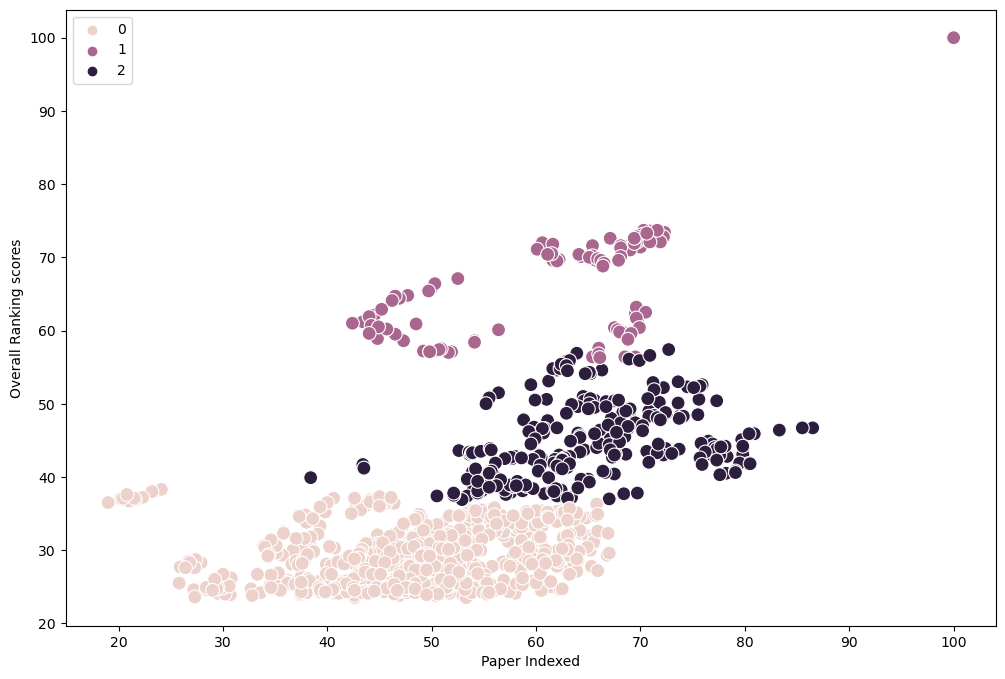

In [69]:
# Plot the clusters for the ranking scores and papers indexed variables for shanghai ranking

plt.figure(figsize=(12,8))
ax_shanghai = sns.scatterplot(x=shanghai_sub2['papers indexed'], y=shanghai_sub2['scores'], hue=kmeans_shanghai.labels_, s=100) 

ax_the.grid(False) 
plt.xlabel('Paper Indexed') 
plt.ylabel('Overall Ranking scores') 
plt.show()

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


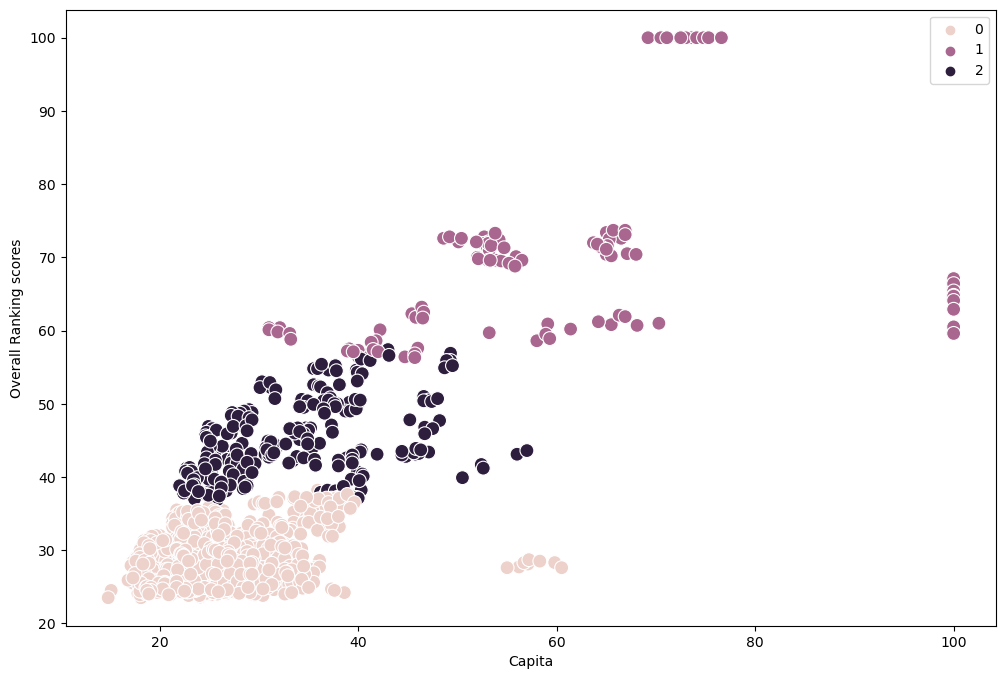

In [70]:
# Plot the clusters for the ranking scores and capita variables for shanghai ranking

plt.figure(figsize=(12,8))
ax_shanghai = sns.scatterplot(x=shanghai_sub2['capita'], y=shanghai_sub2['scores'], hue=kmeans_shanghai.labels_, s=100) 

ax_the.grid(False) 
plt.xlabel('Capita') 
plt.ylabel('Overall Ranking scores') 
plt.show()

### From the analysis above, the clusters for Shanghai ranking is quite clear cut. We can see there's a cluster that's getting high ranking scores, and this cluster also do well in the award indicators (both staff and alumni). They also do well on the papers published and citation indicators, though there are more variances. There isn't much difference in the paper indexed indicator for all clusters. 

### For the other two clusters, they are similar in terms of award indicators, what sets them apart seems to be the papers publised, papers indexed and citations (with pink cluster having higher ranking scores). 

In [71]:
shanghai_sub2.loc[shanghai_sub2['clusters'] == 2, 'cluster'] = 'black'
shanghai_sub2.loc[shanghai_sub2['clusters'] == 1, 'cluster'] = 'purple'
shanghai_sub2.loc[shanghai_sub2['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\Frederick\AppData\Local\Temp\ipykernel_964\3854182343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shanghai_sub2.loc[shanghai_sub2['clusters'] == 2, 'cluster'] = 'black'
C:\Users\Frederick\AppData\Local\Temp\ipykernel_964\3854182343.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'black' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  shanghai_sub2.loc[shanghai_sub2['clusters'] == 2, 'cluster'] = 'black'


In [72]:
# Finding descriptive stats for the clusters - shanghai ranking

shanghai_sub2.groupby('cluster').agg({'alumni award':['mean', 'median'], 
                         'staff award':['mean', 'median'], 
                         'citations':['mean', 'median'],
                         'papers published':['mean', 'median'],
                         'papers indexed':['mean', 'median'],
                         'capita':['mean', 'median'],
                          'scores':['mean', 'median']})

alumni award        staff award         citations         \
                   mean median        mean median       mean median   
cluster                                                               
black         29.344130   30.7   31.027935   33.9  47.170040   45.5   
light pink    11.942588   13.3   10.051752   11.6  32.856334   31.7   
purple        67.639048   67.4   80.243810   80.4  65.307619   59.6   

           papers published        papers indexed            capita         \
                       mean median           mean median       mean median   
cluster                                                                      
black             44.182186   43.1      64.411741   64.2  33.201215   31.4   
light pink        27.022642   26.7      53.709164   53.1  25.493261   25.5   
purple            62.316190   62.0      64.729524   66.0  59.879048   55.2   

               scores         
                 mean median  
cluster                       
black       44.822672   43.8  
light pink  29.262534   29.0  
purple      69.140952   69.5

### The above statistics, along with the cluster analysis, indicates that the data could be split into the following group: universities where more staff/alumi won prestigous awards and universities who are producing high academic output (research, papers published etc). 

In [74]:
the_sub4.to_csv(os.path.join(path, '02. Data','Prepared Data', 'the_subset.csv'))